# HANDWRITTEN DIGITS RECOGNITION

In [71]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [72]:
(X_train,Y_train), (X_test,Y_test) = keras.datasets.mnist.load_data()

In [73]:
len(X_train)

60000

In [74]:
len(X_test)

10000

In [75]:
X_train[0].shape

(28, 28)

In [76]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

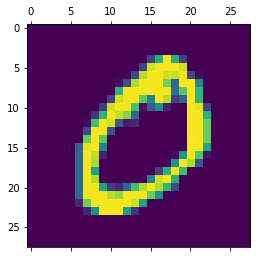

In [77]:
plt.matshow(X_train[1])

In [78]:
Y_train[0]

5

In [79]:
Y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [80]:
X_train = X_train / 255
X_test = X_test / 255

In [81]:
X_train.shape

(60000, 28, 28)

In [82]:
X_train_flattened = X_train.reshape(len(X_train),28*28)
X_test_flattened = X_test.reshape(len(X_test),28*28)


In [83]:
X_train_flattened.shape


(60000, 784)

In [84]:
X_test_flattened.shape

(10000, 784)

In [85]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [86]:
model = keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy']
)
model.fit(X_train_flattened,Y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.7134 - accuracy: 0.8144
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3132 - accuracy: 0.9143
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2875 - accuracy: 0.9205
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2715 - accuracy: 0.9231
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2648 - accuracy: 0.9263


In [87]:
model.evaluate(X_test_flattened, Y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.2651 - accuracy: 0.9260


[0.2651175558567047, 0.9259999990463257]

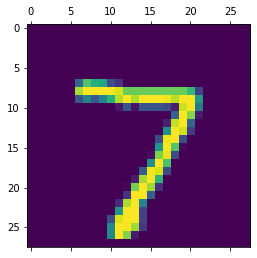

In [88]:
plt.matshow(X_test[0])

In [89]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

array([1.0311514e-02, 5.3048694e-07, 5.1305950e-02, 9.7375214e-01,
       2.5111437e-03, 1.2143269e-01, 1.7484688e-06, 9.9980718e-01,
       1.0938901e-01, 6.9214106e-01], dtype=float32)

In [90]:
np.argmax(y_predicted[8])

6

In [91]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [92]:
Y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [93]:
cm = tf.math.confusion_matrix(labels=Y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 951,    0,    3,    2,    0,    6,   11,    3,    3,    1],
       [   0, 1114,    3,    2,    0,    1,    4,    2,    9,    0],
       [   3,    8,  938,   15,    7,    2,   12,   10,   33,    4],
       [   1,    0,   24,  927,    1,   18,    2,    8,   20,    9],
       [   1,    1,    8,    1,  910,    0,   12,    4,   10,   35],
       [   7,    3,    5,   40,   11,  759,   21,    5,   34,    7],
       [   7,    3,    7,    1,    7,    7,  920,    2,    4,    0],
       [   1,    5,   24,    9,    7,    0,    0,  942,    3,   37],
       [   5,    8,    8,   24,    9,   18,   10,   10,  873,    9],
       [   8,    7,    2,   13,   25,    5,    0,   17,    6,  926]])>

Text(69.0, 0.5, 'Truth')

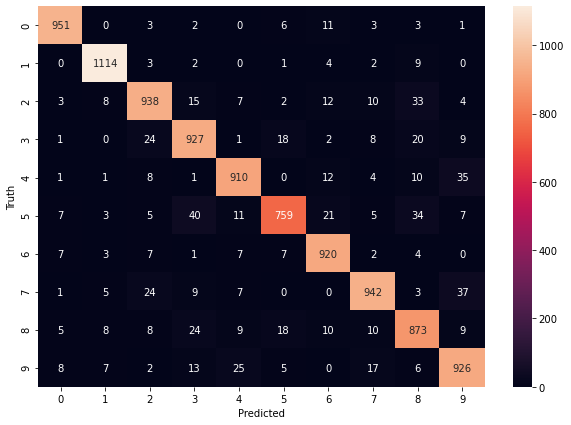

In [94]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [95]:
model = keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy']
)
model.fit(X_train_flattened,Y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4582 - accuracy: 0.8703
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1314 - accuracy: 0.9616
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0874 - accuracy: 0.9736
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0662 - accuracy: 0.9803
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0485 - accuracy: 0.9846


In [96]:
model.evaluate(X_test_flattened,Y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0861 - accuracy: 0.9731


[0.08612637221813202, 0.9731000065803528]

Text(69.0, 0.5, 'Truth')

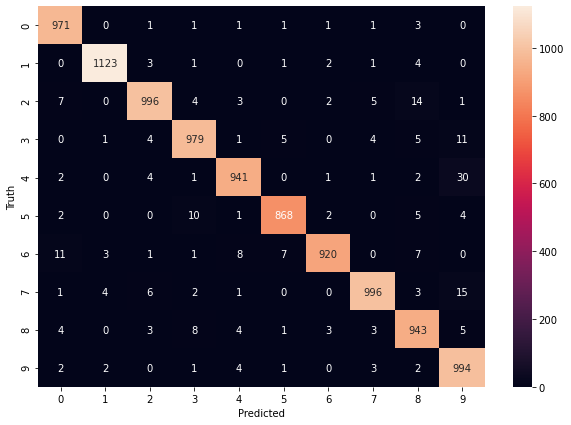

In [97]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=Y_test,predictions=y_predicted_labels)
cm
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [98]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy']
)
model.fit(X_train_flattened,Y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4509 - accuracy: 0.8751
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1292 - accuracy: 0.9631
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0858 - accuracy: 0.9743
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0638 - accuracy: 0.9803
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0501 - accuracy: 0.9845


In [104]:
model.evaluate(X_test,Y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.0880 - accuracy: 0.9722


[0.08797483146190643, 0.9721999764442444]

In [103]:
#Predicting First 10 test images
pred = model.predict(X_test[:10])
# print(pred)
p=np.argmax(pred, axis=1)
print(p)
print(Y_test[:10])

[7 2 1 0 4 1 4 9 5 9]
[7 2 1 0 4 1 4 9 5 9]


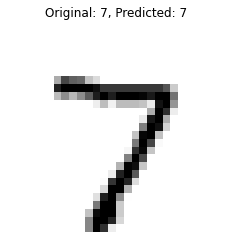

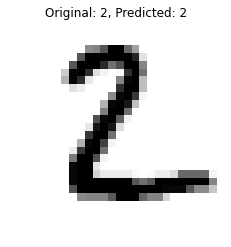

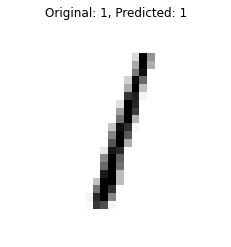

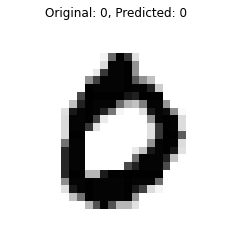

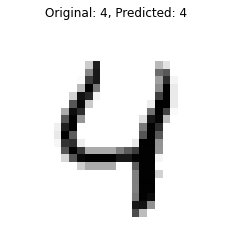

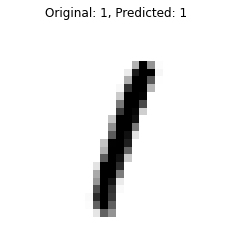

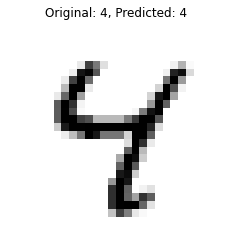

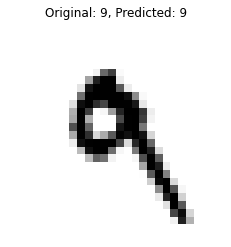

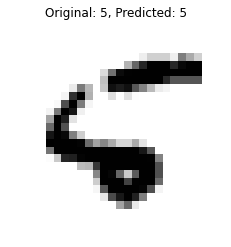

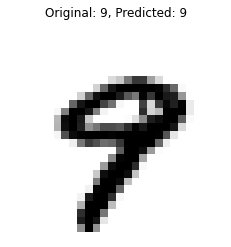

<Figure size 432x288 with 0 Axes>

In [102]:
#Visualizing prediction
for i in range(10):
  plt.imshow(X_test[i], cmap='binary')
  plt.title("Original: {}, Predicted: {}".format(Y_test[i], p[i]))
  plt.axis("Off")
  plt.figure()